In [233]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [148]:
ds= pd.read_csv('user_data.csv')

In [149]:
ds.head()

,Age,Gender,Income,Education,Marital Status,Purchased
0,23,1,35,1,0,0
1,42,0,64,2,1,1
2,56,1,72,3,1,1
3,31,0,45,2,0,0
4,45,1,78,3,1,1


In [150]:
ds.shape

(24, 6)

In [194]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             24 non-null     int64
 1   Gender          24 non-null     int64
 2   Income          24 non-null     int64
 3   Education       24 non-null     int64
 4   Marital Status  24 non-null     int64
 5   Purchased       24 non-null     int64
dtypes: int64(6)
memory usage: 1.2 KB


In [195]:
ds.describe()

,Age,Gender,Income,Education,Marital Status,Purchased
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,37.083333,0.500000,53.458333,2.041667,0.541667,0.625000
std,10.180615,0.510754,21.904892,0.806450,0.508977,0.494535
min,22.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,28.750000,0.000000,34.500000,1.000000,0.000000,0.000000
50%,36.500000,0.500000,52.500000,2.000000,1.000000,1.000000
75%,45.500000,1.000000,72.000000,3.000000,1.000000,1.000000
max,56.000000,1.000000,90.000000,3.000000,1.000000,1.000000


In [198]:
ds.isnull()

,Age,Gender,Income,Education,Marital Status,Purchased
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [207]:
data=ds.drop(['Purchased'],axis=1)
print(data.head())
print("\n")
target=ds['Purchased']
print(target.head())
print(target.value_counts())
#on more method to set data and target
#data=ds.iloc[:,:-1] all column except last one
#target=ds.iloc[:,-1] only last column

   Age  Gender  Income  Education  Marital Status
0   23       1      35          1               0
1   42       0      64          2               1
2   56       1      72          3               1
3   31       0      45          2               0
4   45       1      78          3               1


0    0
1    1
2    1
3    0
4    1
Name: Purchased, dtype: int64


1    15
0     9
Name: Purchased, dtype: int64

C:\Users\Fenil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


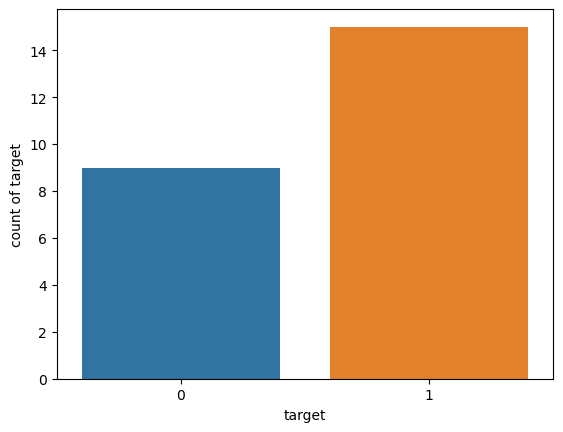

In [210]:
sns.countplot(target)
plt.xlabel("target")
plt.ylabel("count of target")
plt.show()

In [153]:
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.3,random_state=0)

In [154]:
x_train.head(24)
x_test.head(24)
y_train.head(24)
y_test.head(24)

11    0
10    1
22    1
14    1
20    1
1     1
13    1
23    0
Name: Purchased, dtype: int64

In [155]:
x_train.shape

(16, 5)

In [156]:
print(y_train)
print(y_test)

16    1
8     0
6     1
17    1
4     1
2     1
5     0
18    0
9     1
7     1
19    0
3     0
0     0
21    1
15    0
12    1
Name: Purchased, dtype: int64
11    0
10    1
22    1
14    1
20    1
1     1
13    1
23    0
Name: Purchased, dtype: int64


In [157]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [158]:
print(x_train)

[[-0.37909323  1.         -0.09226885  0.         -0.8819171 ]
 [-1.06390682  1.         -0.90185362 -1.26491106 -0.8819171 ]
 [-0.28126272  1.          0.14584431  0.         -0.8819171 ]
 [ 1.18619496 -1.          1.14591961  1.26491106  1.13389342]
 [ 0.89270342  1.          1.24116488  1.26491106  1.13389342]
 [ 1.96883905  1.          0.95542908  1.26491106  1.13389342]
 [-1.35739835 -1.         -1.47332522 -1.26491106 -0.8819171 ]
 [ 0.01222881  1.         -0.47324992  0.          1.13389342]
 [ 0.79487291 -1.          0.76493855  0.          1.13389342]
 [ 1.577517   -1.          1.57452331  1.26491106  1.13389342]
 [-0.67258477 -1.         -1.13996678 -1.26491106 -0.8819171 ]
 [-0.47692374 -1.         -0.33038202  0.         -0.8819171 ]
 [-1.25956784  1.         -0.80660835 -1.26491106 -0.8819171 ]
 [-0.57475426 -1.         -0.66374045  0.         -0.8819171 ]
 [-0.86824579 -1.         -1.28283468 -1.26491106 -0.8819171 ]
 [ 0.50138137  1.          1.33641015  1.26491106  1.13

In [159]:
print(x_test)

[[-1.28373482 -1.         -1.20485667 -1.44115338  0.57735027]
 [-0.27907279  1.         -0.38646346 -0.16012815 -1.73205081]
 [ 0.83721836  1.          0.70472748  1.12089708  0.57735027]
 [ 1.06047659  1.          0.61379491  1.12089708  0.57735027]
 [ 1.1721057   1.          1.52312069  1.12089708  0.57735027]
 [ 0.27907279 -1.          0.34099717 -0.16012815  0.57735027]
 [-0.05581456 -1.          0.15913201 -0.16012815  0.57735027]
 [-1.73025127 -1.         -1.75045214 -1.44115338 -1.73205081]]


In [212]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0,max_depth=8)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=0)

[30.62544806  2.33891303 48.23646183 14.82267874  3.97649835]


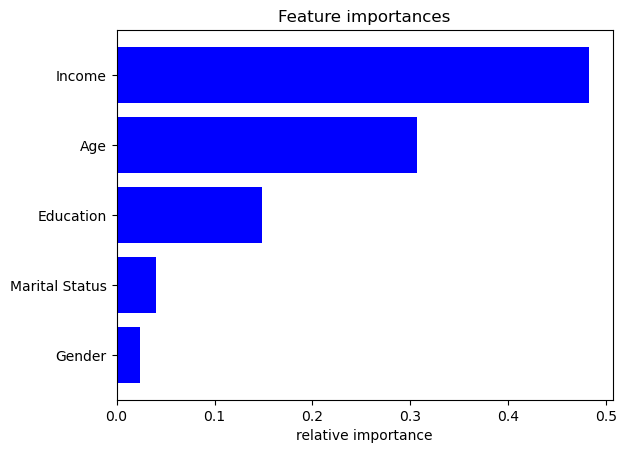

In [237]:
a=rf.feature_importances_
print(a*100)
ds.columns
#also ploy feature important plot
feature=ds.columns
impo=rf.feature_importances_
indices=np.argsort(impo)

plt.title("Feature importances")
plt.barh(range(len(indices)),impo[indices],color='b',align='center')
plt.yticks(range(len(indices)),[feature[i] for i in indices])
plt.xlabel('relative importance')
plt.show()

In [214]:
rf.predict(sc.transform([[23,1,35,1,0]]))
# provide X it will give you Y
rf.predict(sc.transform([[42,0,64,2,1]]))
rf.predict(sc.transform([[31,0,45,2,0]]))

C:\Users\Fenil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Fenil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Fenil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [215]:
y_pred=rf.predict(x_test)
print(y_pred)
print(y_test)

[0 0 1 1 1 1 1 0]
11    0
10    1
22    1
14    1
20    1
1     1
13    1
23    0
Name: Purchased, dtype: int64


In [216]:
# print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [217]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[2 0]
 [1 5]]


0.875

In [218]:
rf.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       random_state=209652396)

In [231]:
#cross validate, make loop and check for some i times
cross_val_score(rf,x_train,y_train,cv=5)

array([0.5       , 0.66666667, 1.        , 0.33333333, 1.        ])

In [234]:
#entire report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8

